In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
import seaborn as sea #for visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [4]:

movies_df = pd.read_csv(r"C:\Users\v ujwal raj\Desktop\imdb data analysis\IMDB-Movie-Data.csv")

In [5]:
movies_df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [6]:
movies_df.columns=[i.split()[0]+"_"+i.split()[1]  if len(i.split())>1 else i for i in movies_df.columns]

# and remove paranthesis
movies_df=movies_df.rename(columns = {'Revenue_(Millions)':'Revenue_Millions'})
movies_df=movies_df.rename(columns = {'Runtime_(Minutes)':'Runtime_Minutes'})

movies_df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

In [7]:

movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                1000 non-null int64
Title               1000 non-null object
Genre               1000 non-null object
Description         1000 non-null object
Director            1000 non-null object
Actors              1000 non-null object
Year                1000 non-null int64
Runtime_Minutes     1000 non-null int64
Rating              1000 non-null float64
Votes               1000 non-null int64
Revenue_Millions    872 non-null float64
Metascore           936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [9]:
movies_df.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


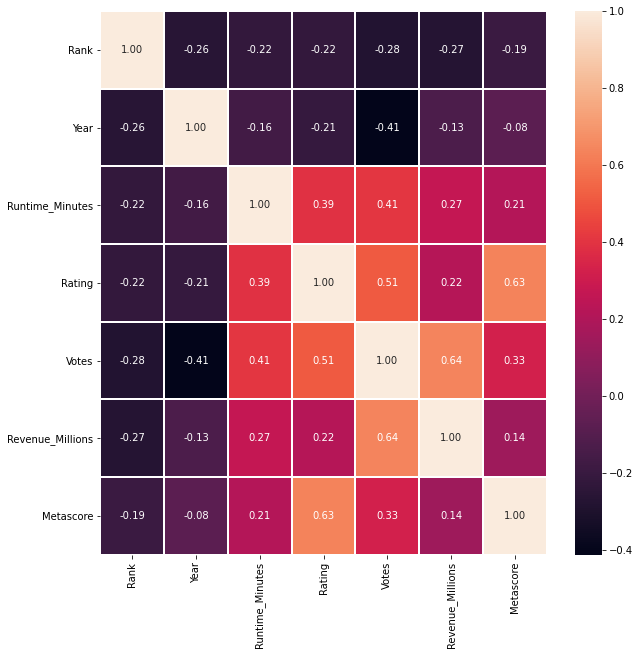

In [10]:
movies_corr = movies_df.corr()
f,ax = plt.subplots(figsize=(10, 10))
sea.heatmap(movies_corr, annot = True, linewidths = 0.1, fmt= '.2f', ax=ax )
plt.show()

In [11]:
print("Rating Points :",movies_df['Rating'].unique())

Rating Points : [8.1 7.  7.3 7.2 6.2 6.1 8.3 6.4 7.1 7.5 7.8 7.9 7.7 6.6 8.2 6.7 8.  6.5
 5.3 6.8 4.7 5.9 6.3 5.6 8.6 7.6 6.9 2.7 3.7 5.8 9.  7.4 4.1 8.5 8.8 5.4
 6.  5.7 8.4 5.2 5.5 4.8 3.9 4.9 5.1 5.  4.3 4.6 4.2 4.  3.2 4.5 1.9 3.5
 4.4]


In [12]:

print(movies_df['Rating'].value_counts())

7.1    52
6.7    48
7.0    46
6.3    44
6.6    42
7.2    42
7.3    42
6.5    40
7.8    40
6.2    37
6.8    37
7.5    35
6.4    35
7.4    33
6.9    31
6.1    31
7.6    27
7.7    27
5.8    26
6.0    26
8.1    26
7.9    23
5.7    21
8.0    19
5.9    19
5.6    17
5.5    14
5.3    12
5.4    12
5.2    11
8.2    10
4.9     7
8.3     7
4.7     6
8.5     6
4.6     5
5.1     5
5.0     4
4.8     4
4.3     4
8.4     4
3.9     3
8.6     3
8.8     2
2.7     2
4.2     2
3.5     2
3.7     2
9.0     1
3.2     1
4.0     1
4.5     1
4.4     1
4.1     1
1.9     1
Name: Rating, dtype: int64


<AxesSubplot:ylabel='Rating'>

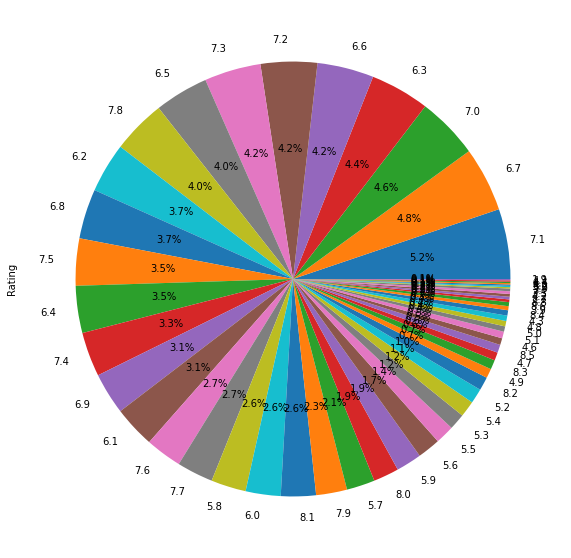

In [13]:
plt.figure(1, figsize=(10,10))
movies_df['Rating'].value_counts().plot.pie(autopct="%1.1f%%")

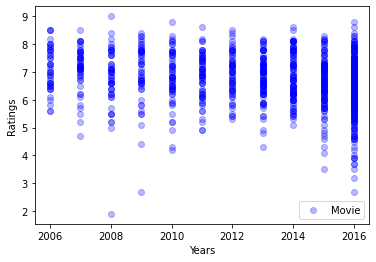

In [14]:

plt.scatter(movies_df.Year, movies_df.Rating, alpha = 0.28, label = "Movie", color = "blue")
plt.xlabel("Years")
plt.ylabel("Ratings")
plt.legend(loc = "lower right")
plt.show()

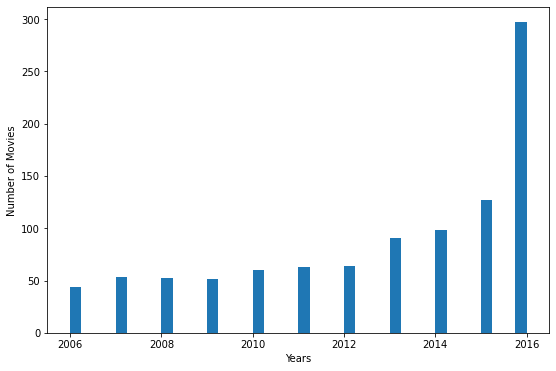

In [15]:
movies_df.Year.plot(kind = "hist", bins = 40, figsize = (9,6))
plt.xlabel("Years")
plt.ylabel("Number of Movies")
plt.show()

In [16]:
movies_df["Runtime_Minutes"].value_counts()

108    31
100    28
117    27
110    26
106    26
       ..
164     1
166     1
170     1
172     1
66      1
Name: Runtime_Minutes, Length: 94, dtype: int64

Text(0.5, 1.0, 'Top 10 runtime of Movies')

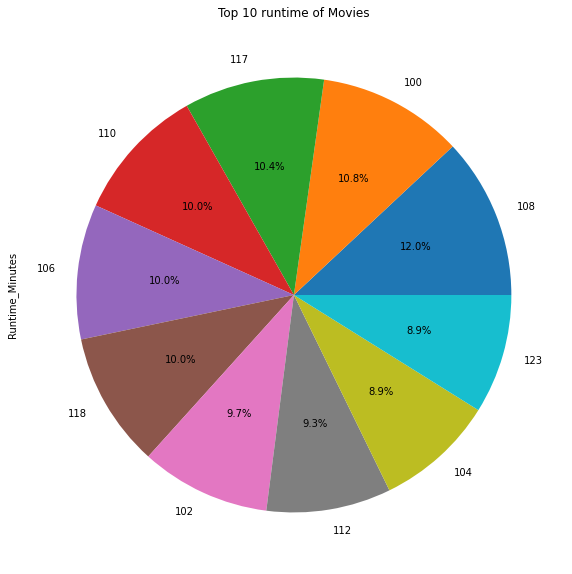

In [17]:
movies_df.Runtime_Minutes.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Top 10 runtime of Movies')

C:\Users\v ujwal raj\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\v ujwal raj\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Counts')

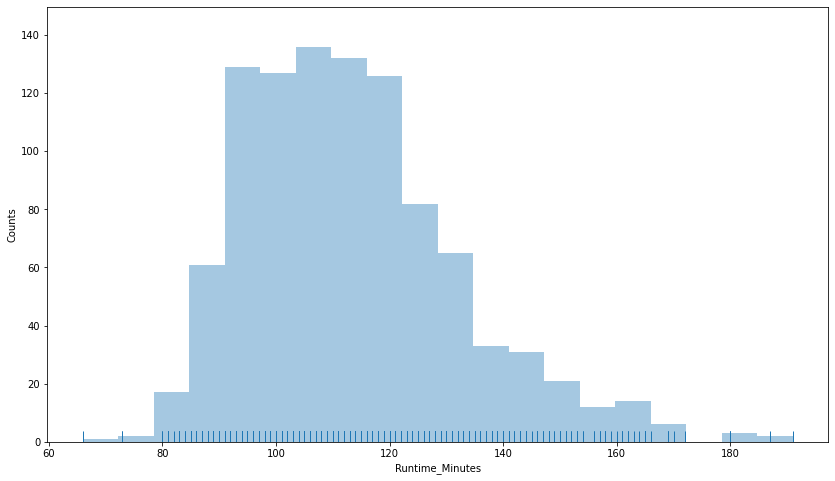

In [18]:
movies_time=movies_df.Runtime_Minutes
f,ax = plt.subplots(figsize=(14, 8))
sea.distplot(movies_time, bins=20, kde=False,rug=True, ax=ax);
plt.ylabel("Counts")